### TASK 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data = data.drop_duplicates()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
features = data.drop('Aggregate rating', axis=1)
target = data['Aggregate rating']

In [6]:
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [7]:
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()



In [8]:
target

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [11]:

from sklearn.tree import DecisionTreeRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=2))
])



In [12]:
from sklearn.ensemble import RandomForestRegressor

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=2))
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, test_size=0.2, random_state=42)


In [15]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Restaurant ID',
                                                   'Country Code', 'Longitude',
                                                   'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Restaurant Name', 'City',
                                                   'Address', 'Locality',
                                                   'Locality Verbose',
                                                   'Cuisines', 'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating color',
                                                   'Rating text'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, random_state=2))])

In [16]:
model2.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Restaurant ID',
                                                   'Country Code', 'Longitude',
                                                   'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Restaurant Name', 'City',
                                                   'Address', 'Locality',
                                                   'Locality Verbose',
                                                   'Cuisines', 'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating color',
                                                   'Rating text'])])),
                ('regressor', RandomForestRegressor(random_state=2))])

In [17]:
y_pred = model.predict(X_test)


In [18]:
y_pred2 = model2.predict(X_test2)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.11533170382990358


In [20]:
mae2 = mean_absolute_error(y_test2, y_pred2)
print(f'Mean Absolute Error: {mae2}')

Mean Absolute Error: 0.10944217687074814


In [21]:
y_pred

array([2.3442623 , 4.15263158, 2.96386555, ..., 3.        , 4.25416667,
       4.15263158])

In [22]:
y_pred2

array([2.337, 4.098, 3.016, ..., 3.104, 4.232, 4.091])

In [23]:
y_test

4731    2.1
1468    4.1
9037    3.2
7866    4.4
5570    3.5
       ... 
8149    2.6
5849    0.0
9019    3.1
742     4.2
180     4.3
Name: Aggregate rating, Length: 1911, dtype: float64

In [24]:
y_test2

4731    2.1
1468    4.1
9037    3.2
7866    4.4
5570    3.5
       ... 
8149    2.6
5849    0.0
9019    3.1
742     4.2
180     4.3
Name: Aggregate rating, Length: 1911, dtype: float64

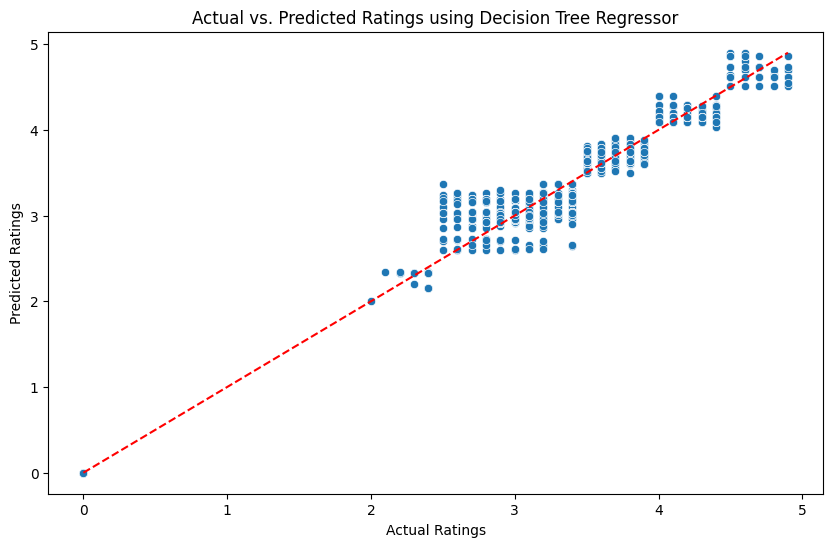

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings using Decision Tree Regressor')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

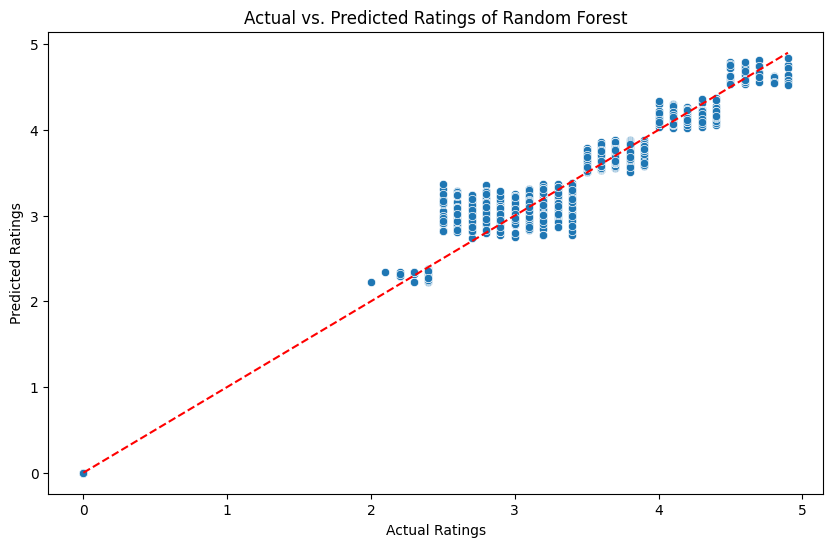

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=y_pred2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings of Random Forest')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.show()

In [27]:
better_mae = min(mae, mae2)

print(better_mae)

0.10944217687074814


### therefore the RandomForestRegressor performs better